# Testing (Chaplot vs BabyAI) + PPO on my babyAI Kitchen tasks

In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/sfgen/") # 
print("Started")

Started


In [2]:
from IPython.display import display, HTML

from sfgen.tools.tensorboard_data import TensorboardData
from sfgen.tools.tensorboard_vistool import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [38]:
run_data = TensorboardData(
    search_paths=[],
    search_kwargs=dict(
        basepath="/mnt/brain5/scratch/wcarvalh/projects/sfgen/data/local/",
#         split=['date','time', 'experiment', 'variant'],
        njobs=1,
        verbose=1,
    )
)

In [39]:
run_data.load_paths(
    search_paths=[
        "2021.01.30/*/*/*",
        "2021.02.01/*/*/*",
    ]
)
run_data.settings_df.head()

get_runs: /mnt/brain5/scratch/wcarvalh/projects/sfgen/data/local/2021.02.01/*/*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/sfgen/data/local/2021.01.30/*/*/*
loaded: 100%|██████████| 33/33 [00:00<00:00, 31500.23it/s]

/mnt/brain5/scratch/wcarvalh/projects/sfgen/data/local/2021.02.01/*/*/*: 9
/mnt/brain5/scratch/wcarvalh/projects/sfgen/data/local/2021.01.30/*/*/*: 24


,date,time,experiment,settings,fullpath,experiment_settings
0,2021.02.01,16.31.46,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby..."
1,2021.02.01,16.31.46,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby..."
2,2021.02.01,16.31.46,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby..."
3,2021.02.01,16.32.05,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby..."
4,2021.02.01,16.32.05,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby..."


In [40]:
run_data.load_settings(skip='task2idx')
run_data.settings_df.head()

,date,time,experiment,settings,fullpath,experiment_settings,algo:entropy_loss_coeff,model:dual_body,model:task_modulation,model:film_residual,...,env:level_kwargs:num_dists,model:intrustion_policy_input,env:strict_task_idx_loading,level:num_dists,level:tile_size,sampler:batch_B,model:film_bias,model:lstm_size,env:num_missions,sampler:eval_max_steps
0,2021.02.01,16.31.46,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby...",0.01,False,chaplot,True,...,0,True,True,0,12,64,True,128,0,500000
1,2021.02.01,16.31.46,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby...",0.01,False,chaplot,True,...,10,True,True,10,12,64,True,128,0,500000
2,2021.02.01,16.31.46,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby...",0.01,False,chaplot,True,...,5,True,True,5,12,64,True,128,0,500000
3,2021.02.01,16.32.05,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby...",0.01,False,chaplot,True,...,0,True,True,0,12,64,True,128,0,500000
4,2021.02.01,16.32.05,kitchen_baselines_2,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",/mnt/brain5/scratch/wcarvalh/projects/sfgen/da...,"kitchen_baselines_2/agent=chaplot_ppo,env=baby...",0.01,False,chaplot,True,...,10,True,True,10,12,64,True,128,0,500000


In [54]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'cumsteps' in k.lower() or 'average' in k.lower(),
#     load_paths=True
)

settings: 100%|██████████| 27/27 [00:02<00:00,  9.34it/s]


In [34]:
nonzero_key = run_data.keys_like('nonzeroreward')[0]
return_key = run_data.keys_like('return')[0]
length_key = run_data.keys_like('length')[0]
steps_key = run_data.keys_like('cumsteps')[0]
print(nonzero_key, return_key, length_key, steps_key)

NonzeroRewards/Average Return/Average Length/Average Diagnostics/CumSteps


In [42]:
search_space=dict(
    settings=dict(
        agent=['babyai_ppo', 'chaplot_ppo'],
        # agent=['chaplot_ppo'],
        env=['babyai_kitchen'],
    ),
    level=dict(
        task_kinds=[
            ['slice'],
            ['heat'],
            ['slice', 'cool'],
            ['cool'],
            ['cook'],
        ],
        num_dists=[
            0,
            5,
            10
        ],
    )

)

panel_tool = PanelTool(
    title_with_legend='Heat (2 tasks)',
    filter_column='mean',
    dims_to_plot=dict(
        level=dict(
            task_kinds=[
                ['slice'],
                ['heat'],
                ['slice', 'cool'],
                ['cool'],
                ['cook'],
            ],
        )
    ),
    dim_titles=[
        "Slice (4 tasks)",
        "Heat (2 tasks)",
        "Slice/Cool (8 tasks)",
        "Cool (4 tasks)",
        "Cook (8 tasks)",
    ],
    plot_settings=[
            dict(
                key=nonzero_key,
                title="Average Success Rate",
                ylabel='Success Rate',
                xlabel='Frames',
                ylim=[0,1],
            ),
#             dict(
#                 key=length_key,
#                 title="Average Length",
#                 xlabel='Frames',
#             )
    ],
  
    
    
    
    
    filter_key=return_key,
    plot_data_kwargs=dict(xlabel_key=steps_key),
    tensorboard_data=run_data,
    metadata_settings_dict=search_space,
)


,settings,settings:agent,settings:env,level:task_kinds,level:num_dists,num_seeds
8,NaN,NaN,NaN,NaN,NaN,2.0
11,"agent=babyai_ppo,env=babyai_kitchen,num_dists=...",babyai_ppo,babyai_kitchen,[slice],0.0,1.0
14,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",chaplot_ppo,babyai_kitchen,[slice],0.0,NaN


No Matches for {'settings:agent': 'babyai_ppo', 'level:task_kinds': ['cool'], 'level:num_dists': 0}
No Matches for {'settings:agent': 'babyai_ppo', 'level:task_kinds': ['cook'], 'level:num_dists': 0}


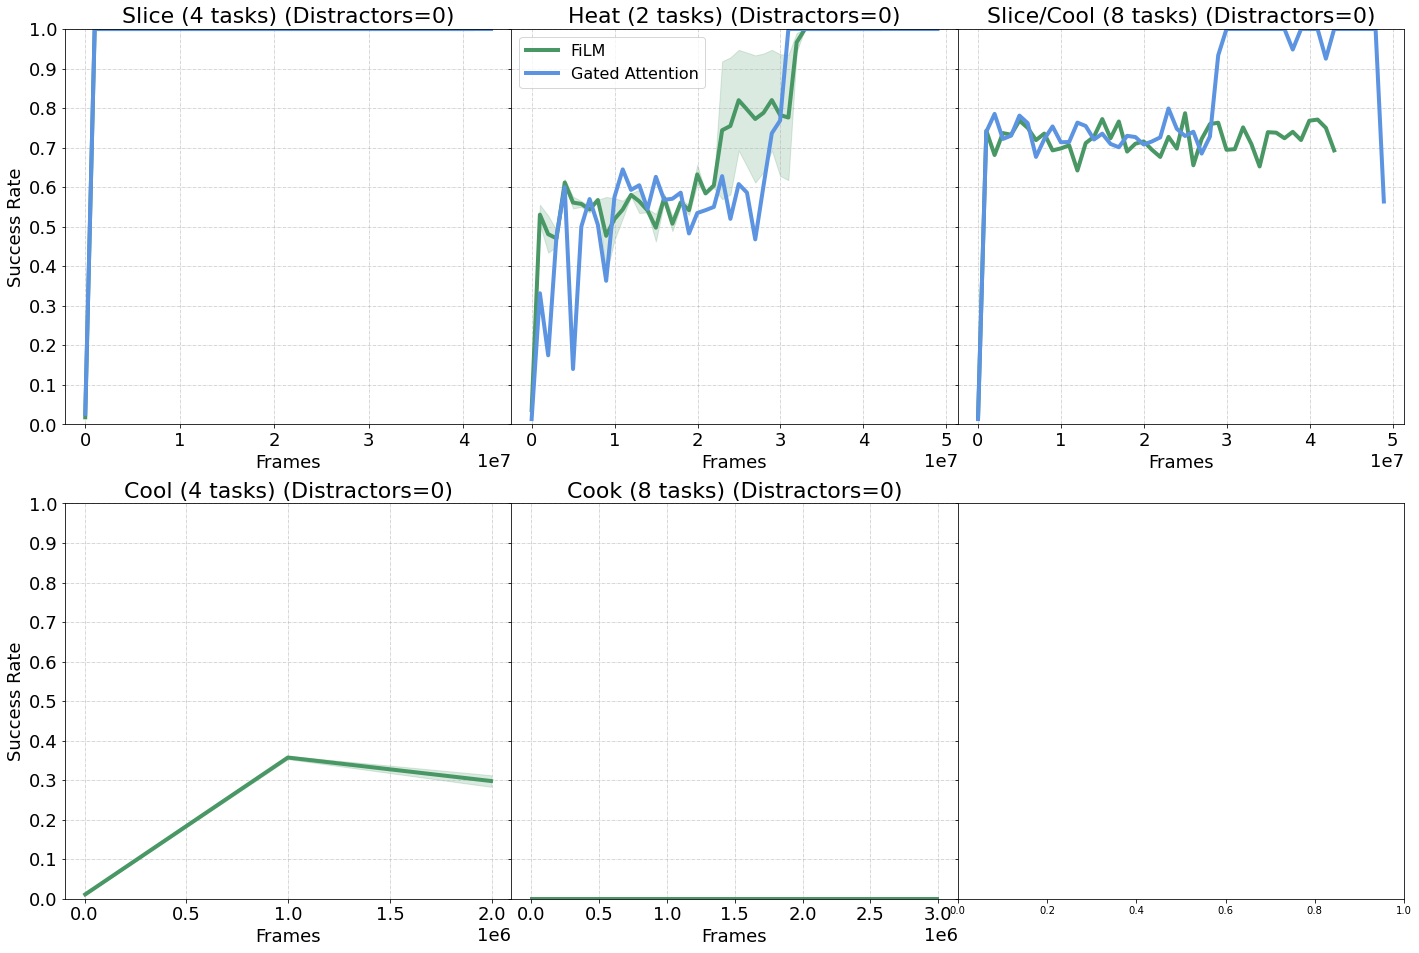

,settings,settings:agent,settings:env,level:task_kinds,level:num_dists,num_seeds
14,NaN,NaN,NaN,NaN,NaN,2.0
17,"agent=babyai_ppo,env=babyai_kitchen,num_dists=...",babyai_ppo,babyai_kitchen,[slice],5.0,2.0
20,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",chaplot_ppo,babyai_kitchen,[slice],5.0,NaN


No Matches for {'settings:agent': 'babyai_ppo', 'level:task_kinds': ['cool'], 'level:num_dists': 5}
No Matches for {'settings:agent': 'babyai_ppo', 'level:task_kinds': ['cook'], 'level:num_dists': 5}


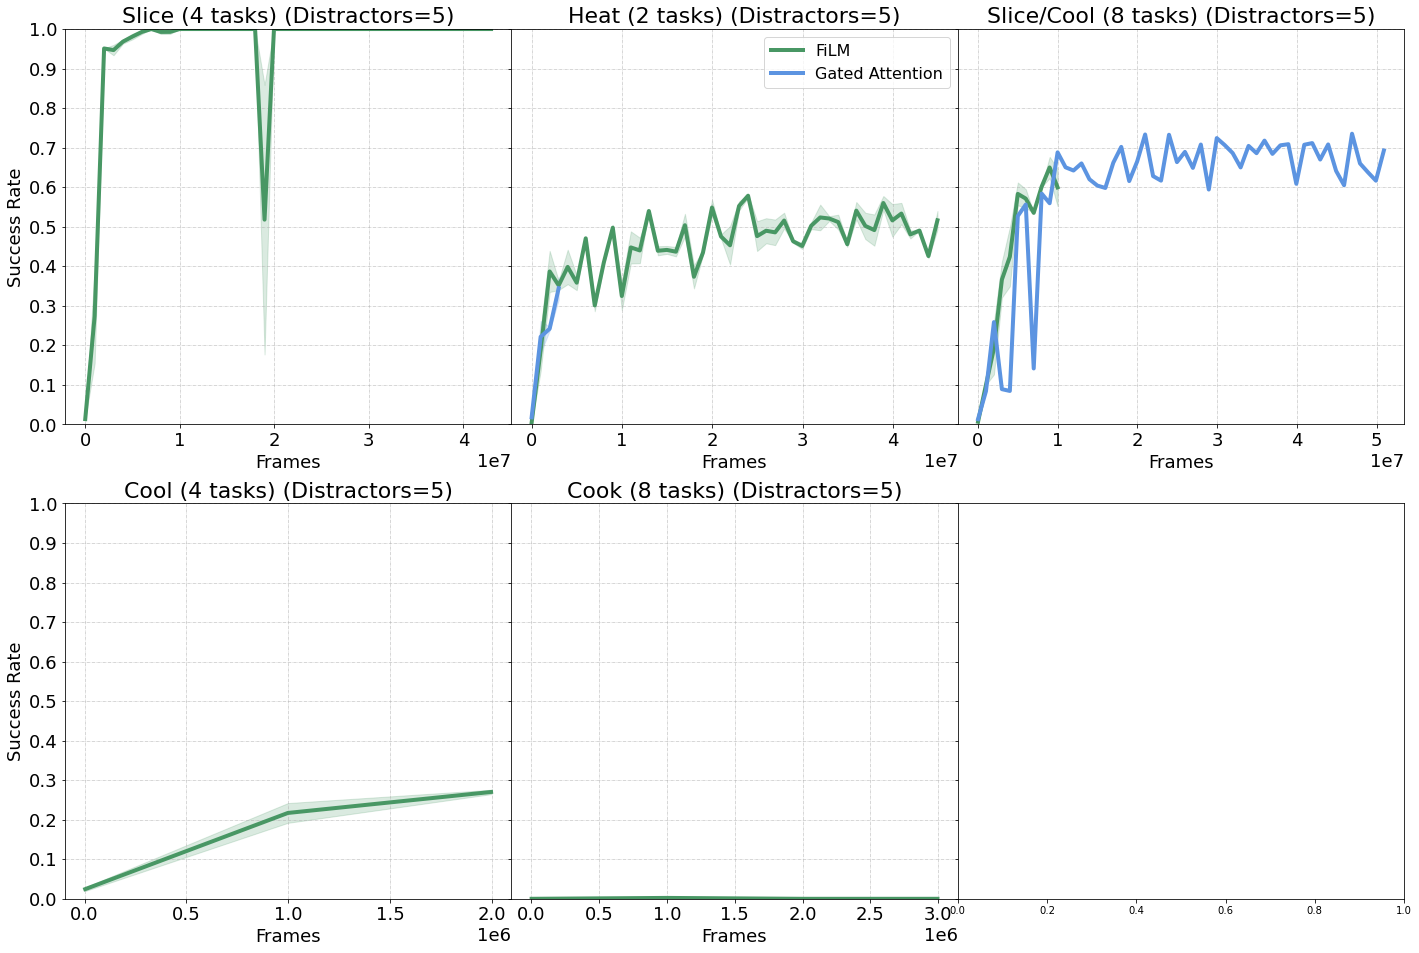

,settings,settings:agent,settings:env,level:task_kinds,level:num_dists,num_seeds
20,NaN,NaN,NaN,NaN,NaN,1.0
23,"agent=babyai_ppo,env=babyai_kitchen,num_dists=...",babyai_ppo,babyai_kitchen,[slice],10.0,1.0
26,"agent=chaplot_ppo,env=babyai_kitchen,num_dists...",chaplot_ppo,babyai_kitchen,[slice],10.0,NaN


No Matches for {'settings:agent': 'babyai_ppo', 'level:task_kinds': ['cool'], 'level:num_dists': 10}
No Matches for {'settings:agent': 'babyai_ppo', 'level:task_kinds': ['cook'], 'level:num_dists': 10}


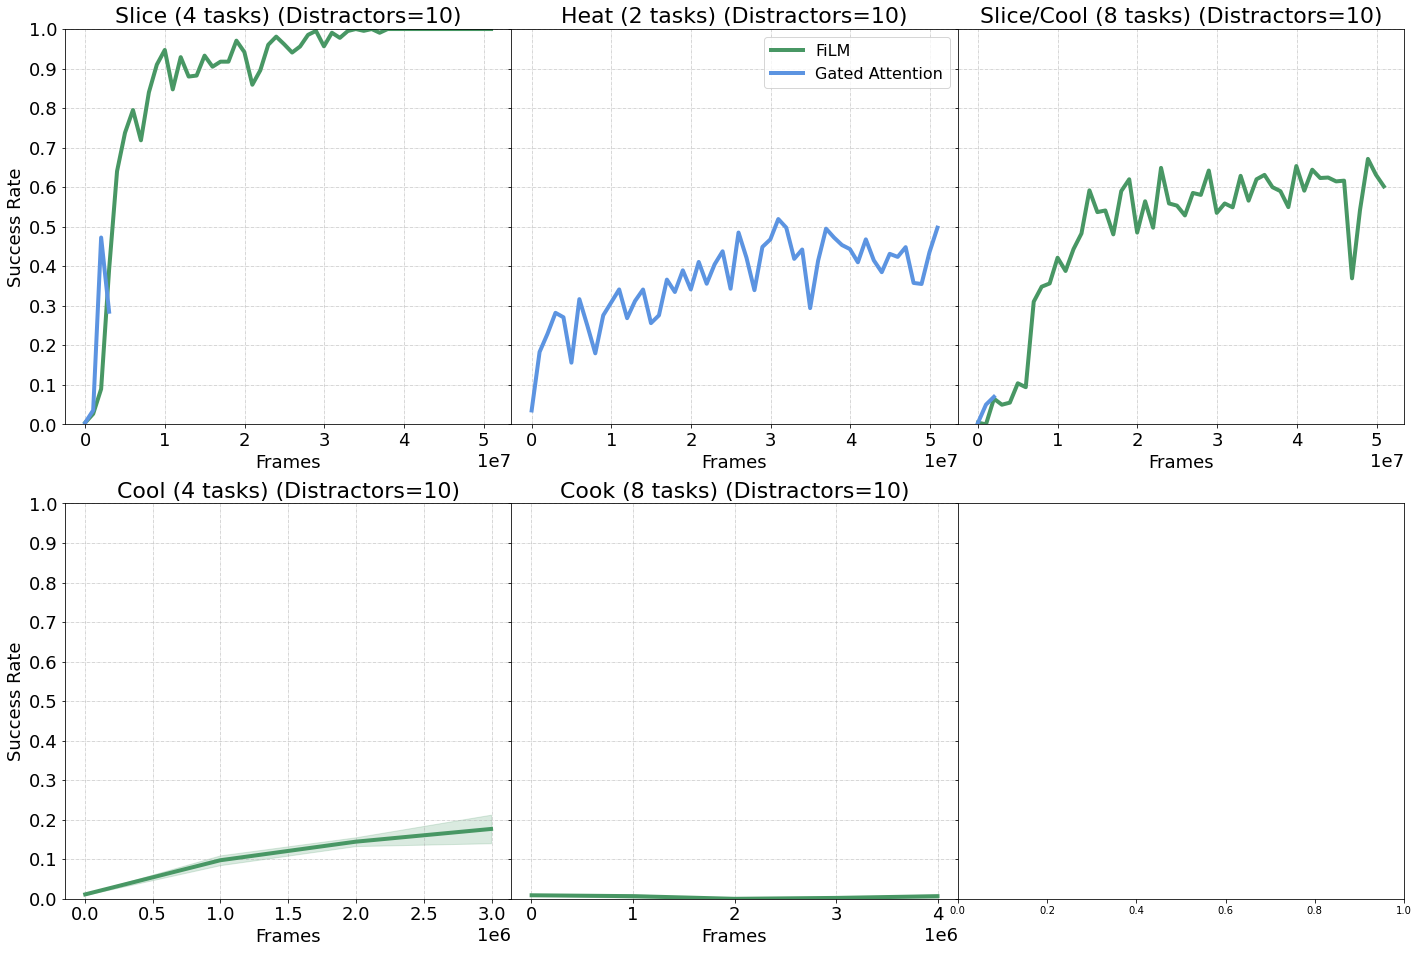

In [47]:
# display(HTML(f"<h1>What's the overall progress?</h1>"))        
# %debug

for nd in [0, 5, 10]:
    panel_tool.plot_filters_across_dimensions(
        title_addition=f"(Distractors={nd})",
        maxcols=3,
        legend_kwargs='none',
        common_settings=dict(
            level=dict(num_dists=nd)
        ),
        data_filters=[
            dict(
                settings=dict(
                    settings=dict(
                        agent='babyai_ppo',
                    ),
                ),
                label='FiLM'
            ),
            dict(
                settings=dict(
                    settings=dict(
                        agent='chaplot_ppo',
                    ),
                ),
                label='Gated Attention'
            )
        ]
    )

> /mnt/brain5/scratch/wcarvalh/projects/sfgen/sfgen/tools/tensorboard_vistool.py(638)make_subplots()
    637     import ipdb; ipdb.set_trace()
--> 638     if not 'figsize' in kwargs:
    639         height=nrows*unit



ipdb>  num_plots


5


ipdb>  c


,settings,settings:agent,settings:env,level:task_kinds,level:num_dists,num_seeds
8,NaN,NaN,NaN,NaN,NaN,2.0
11,"agent=babyai_ppo,env=babyai_kitchen,num_dists=...",babyai_ppo,babyai_kitchen,[slice],0.0,NaN
14,NaN,NaN,NaN,NaN,NaN,2.0
17,"agent=babyai_ppo,env=babyai_kitchen,num_dists=...",babyai_ppo,babyai_kitchen,[slice],5.0,NaN
20,NaN,NaN,NaN,NaN,NaN,1.0
23,"agent=babyai_ppo,env=babyai_kitchen,num_dists=...",babyai_ppo,babyai_kitchen,[slice],10.0,NaN


No Matches for {'level:num_dists': 0, 'level:task_kinds': ['cool'], 'settings:agent': 'babyai_ppo'}
No Matches for {'level:num_dists': 5, 'level:task_kinds': ['cool'], 'settings:agent': 'babyai_ppo'}
No Matches for {'level:num_dists': 10, 'level:task_kinds': ['cool'], 'settings:agent': 'babyai_ppo'}
No objects found for {'level:task_kinds': ['cool']}
No Matches for {'level:num_dists': 0, 'level:task_kinds': ['cook'], 'settings:agent': 'babyai_ppo'}
No Matches for {'level:num_dists': 5, 'level:task_kinds': ['cook'], 'settings:agent': 'babyai_ppo'}
No Matches for {'level:num_dists': 10, 'level:task_kinds': ['cook'], 'settings:agent': 'babyai_ppo'}
No objects found for {'level:task_kinds': ['cook']}


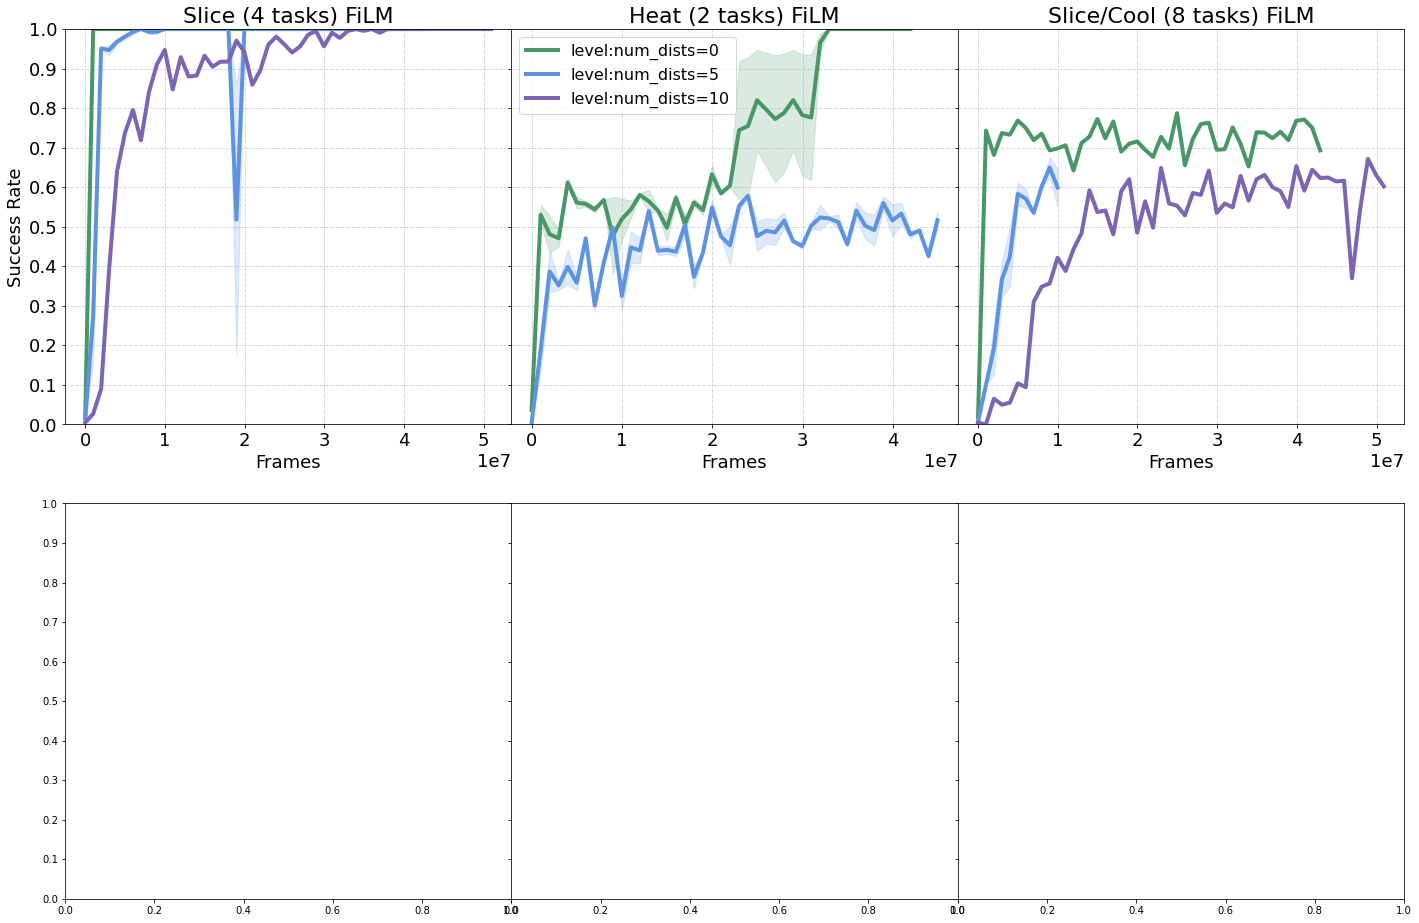

In [58]:
# display(HTML(f"<h1>What's the overall progress?</h1>"))        
# %debug
baseline2name={
    'babyai_ppo' : "FiLM",
#     'chaplot_ppo' : "Gated Attention",
}
for agent in baseline2name.keys():
    panel_tool.plot_filters_across_dimensions(
        title_addition=baseline2name[agent],
        maxcols=3,
        legend_kwargs='none',
        common_settings=dict(
            settings=dict(agent=agent),
        ),
        data_filter_space=dict(
                    level=dict(num_dists=[0, 5, 10]),
                ),
    )